# CS-651-A TEXT BASED ANALYSIS
# Sai Vandana - 0939231
# Assignment - 4 4/20/2024

## Reddit API 
The below code initializes a connection to Reddit's API using PRAW with specified credentials to programmatically interact with Reddit data.

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="nBP9OgcS9m3nP5Sc1OF03w",
    client_secret="H2N9fF4pv9lRPIaIpCgwi-NwilIszA",
    user_agent=user_agent
)

## Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import re 

The below code iterates over the posts in the "elections" subreddit, prints various details of the first post

In [4]:
headlines = set()
for submission in reddit.subreddit("elections").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

USA: 2022 Pennsylvania Elections: Donald Trump Is Still The "KING" To Many People, Including Some Who Believe The Falsehood That Trump Won The 2020 Election, But Will It Help The Republican Party?
xtq5d5
Motor-Ad-8858
1664720808.0
8
1.0
https://apnews.com/article/2022-midterm-elections-steve-bannon-donald-trump-campaigns-presidential-3542ec650fd275d80cd97f12e648e904
0


## This code collects the titles of all hot posts from the "elections" subreddit using Reddit's API

In [5]:
headlines = set()
for submission in reddit.subreddit("elections").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))


822


## Code to create a dataframe from the scrapped data 

In [6]:
#Create a dataframe from the scrapped data 
elections_df = pd.DataFrame(headlines)
elections_df.head()

,0
0,USA: Pennsylvania 2022 GOP Primary Elections: ...
1,Elections Hackers and Worse Pretending to Be A...
2,Bernie Sanders’ Chicago 2020 speech to focus o...
3,Question about political rules and the midterms
4,"""Trump must reckon with new realities in wake ..."


## This code modifies the DataFrame elections_df by removing the first column

In [7]:
df = elections_df.iloc[:, 1:]
elections_df.head()

,0
0,USA: Pennsylvania 2022 GOP Primary Elections: ...
1,Elections Hackers and Worse Pretending to Be A...
2,Bernie Sanders’ Chicago 2020 speech to focus o...
3,Question about political rules and the midterms
4,"""Trump must reckon with new realities in wake ..."


In [8]:
elections_df.columns

RangeIndex(start=0, stop=1, step=1)

Code to create a column name as titles

In [9]:
elections_df.columns = ['Titles']

In [10]:
elections_df.head()

,Titles
0,USA: Pennsylvania 2022 GOP Primary Elections: ...
1,Elections Hackers and Worse Pretending to Be A...
2,Bernie Sanders’ Chicago 2020 speech to focus o...
3,Question about political rules and the midterms
4,"""Trump must reckon with new realities in wake ..."


In [11]:
elections_df.Titles.duplicated().sum() 

0

## To create a function to clean the tweets

In [12]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
elections_df["Titles"]=elections_df["Titles"].apply(cleanTxt)

#Show the clean text
elections_df.head()

,Titles
0,USA Pennsylvania 2022 GOP Primary Elections Cr...
1,Elections Hackers and Worse Pretending to Be A...
2,Bernie Sanders’ Chicago 2020 speech to focus o...
3,Question about political rules and the midterms
4,"""Trump must reckon with new realities in wake ..."


## Code to remove emoji & Unicode from the reddit data

In [13]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
elections_df["Titles"]= elections_df["Titles"].apply(remove_emoji)

#Show the clean text
elections_df.head()

,Titles
0,USA Pennsylvania 2022 GOP Primary Elections Cr...
1,Elections Hackers and Worse Pretending to Be A...
2,Bernie Sanders’ Chicago 2020 speech to focus o...
3,Question about political rules and the midterms
4,"""Trump must reckon with new realities in wake ..."


In [14]:
!pip install textblob

## This code defines two functions using the TextBlob library to analyze sentiment in text. 

In [15]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
elections_df['Subjectivity'] = elections_df['Titles'].apply(getSubjectivity)
elections_df['Polarity'] = elections_df['Titles'].apply(getPolarity)

#Now display data
elections_df.head()

,Titles,Subjectivity,Polarity
0,USA Pennsylvania 2022 GOP Primary Elections Cr...,0.428571,0.200000
1,Elections Hackers and Worse Pretending to Be A...,0.600000,-0.400000
2,Bernie Sanders’ Chicago 2020 speech to focus o...,0.000000,0.000000
3,Question about political rules and the midterms,0.100000,0.000000
4,"""Trump must reckon with new realities in wake ...",0.454545,0.136364


## Function to group the range of Polarity to different categories

In [17]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
elections_df["Insight"] = elections_df["Polarity"].apply(getInsight)

elections_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,USA Pennsylvania 2022 GOP Primary Elections Cr...,0.428571,0.200000,Positive
1,Elections Hackers and Worse Pretending to Be A...,0.600000,-0.400000,Negative
2,Bernie Sanders’ Chicago 2020 speech to focus o...,0.000000,0.000000,Neutral
3,Question about political rules and the midterms,0.100000,0.000000,Neutral
4,"""Trump must reckon with new realities in wake ...",0.454545,0.136364,Positive
5,"Wake up, America!",0.000000,0.000000,Neutral
6,A third woman alleges she was sexually assault...,0.416667,0.250000,Positive
7,USA Georgia Republicans Kemp and Perdue clash ...,0.000000,0.000000,Neutral
8,BREAKING! Another finding at Newsweek’s backyard…,0.000000,0.000000,Neutral
9,An Associated Press Survey Of State Election O...,0.500000,-0.031250,Negative


In [18]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Code to plot the values count of elections

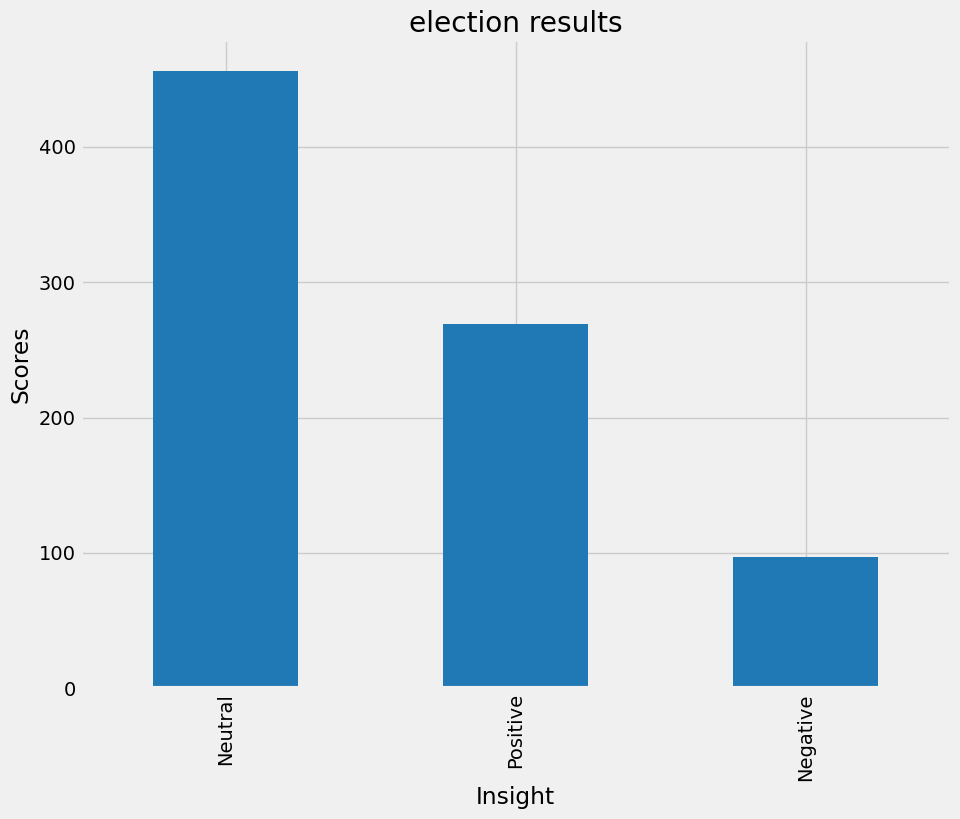

In [22]:
#Plot the values count of elections
plt.title("election results")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (12,8)
elections_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Code to print the word cloud

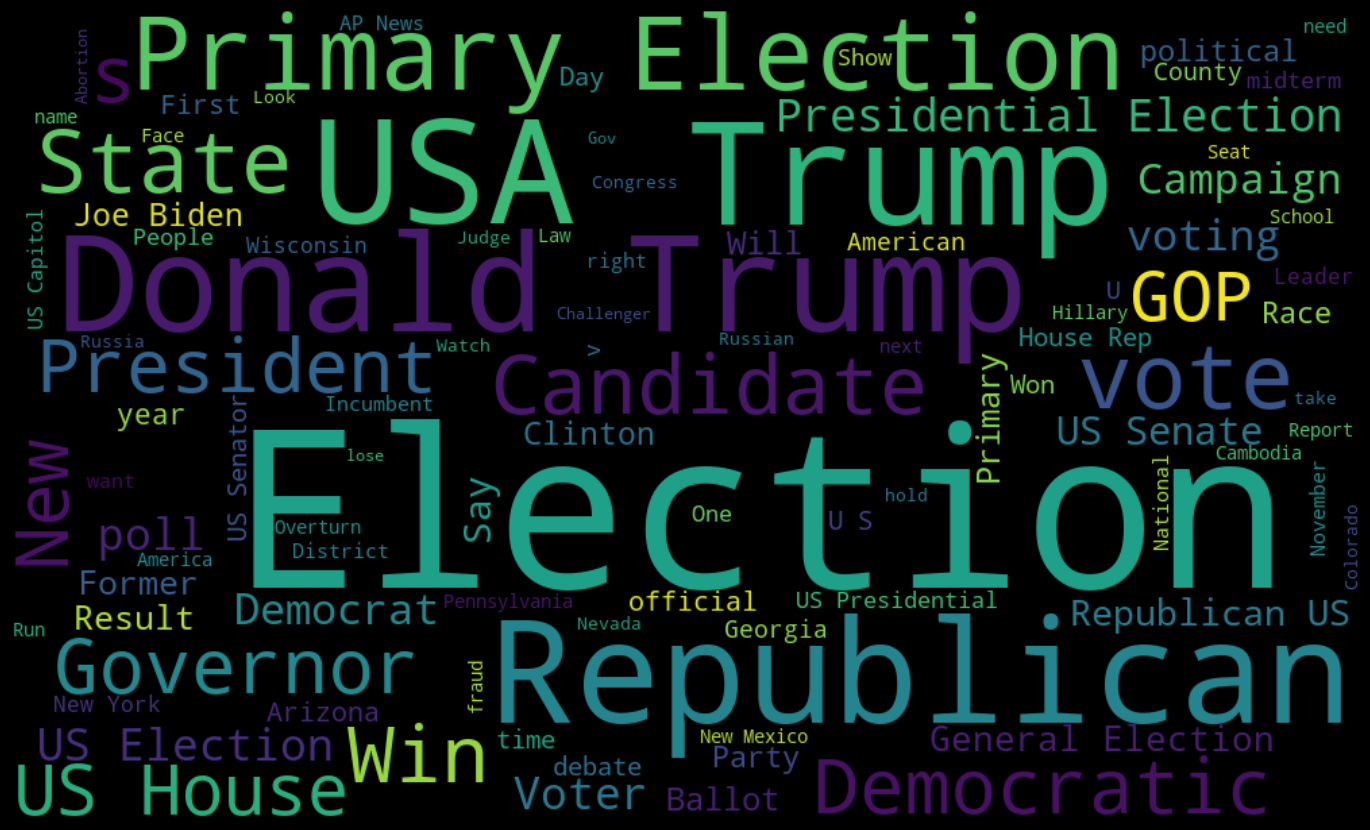

In [20]:
text = ' '.join( [twts for twts in elections_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## Code to generate a wordcloud for two political parties

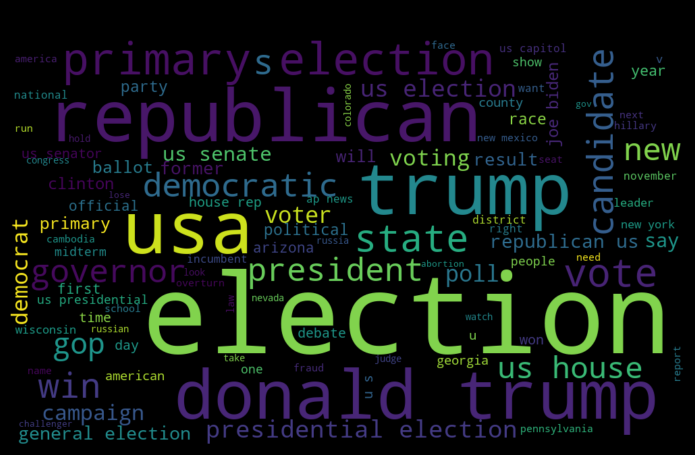

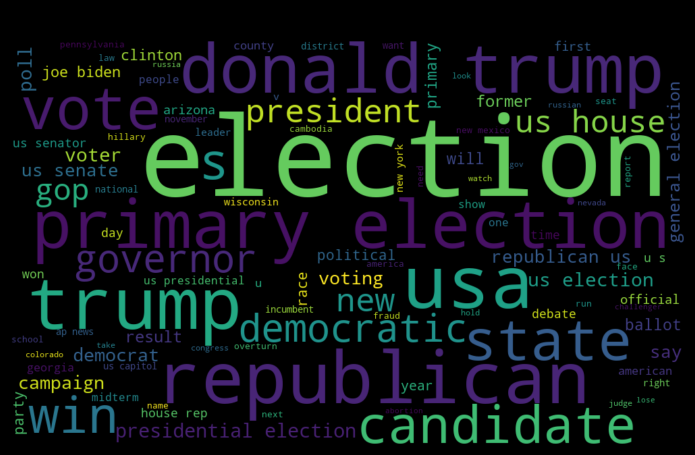

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_word_cloud(dataframe, company_name):
    # Join all texts from the dataframe
    text = ' '.join(twts.lower() for twts in dataframe['Titles'])  # Change 'Titles' if your column name is different

    # Generate word cloud
    wordcloud = WordCloud(
        width=1000,
        height=600,
        max_words=100,
        stopwords=STOPWORDS,
        background_color="black"
    ).generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {company_name}')
    plt.axis("off")
    plt.show()

# Assuming Republican and Democratic are your dataframes 
generate_word_cloud(elections_df, "Republican")
generate_word_cloud(elections_df, "Democratic")
